<a href="https://colab.research.google.com/github/RayenBoukhchina/creditbank-system/blob/main/creditbanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 10.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/loan-prediction-problem-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [ ]:
pd.set_option('display.max_rows',10)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
duplicates= df.duplicated()

In [ ]:
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
...,...
Education,0
ApplicantIncome,0
CoapplicantIncome,0
Property_Area,0


In [ ]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


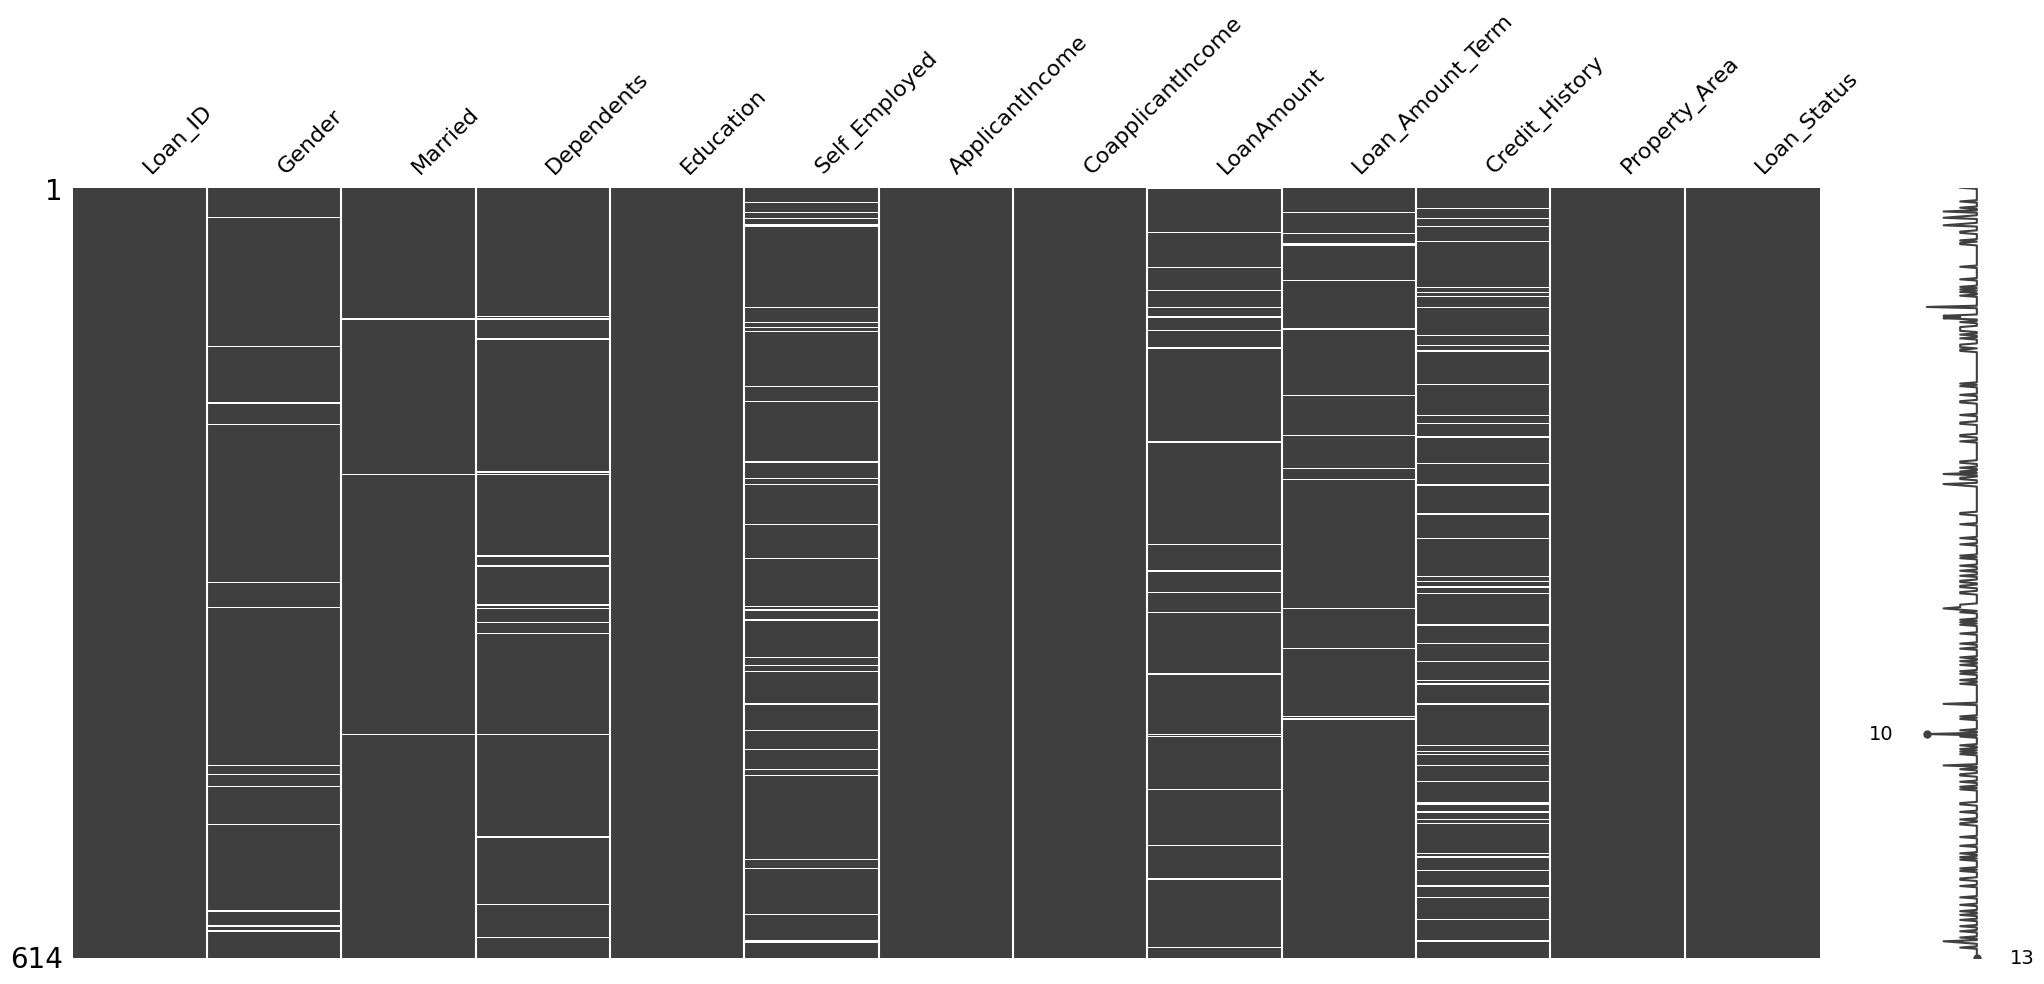

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c== object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])

    type(cat_data)

In [ ]:
cat_data=pd.DataFrame(cat_data)
cat_data

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Property_Area,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Semiurban,Urban,Semiurban,...,Semiurban,Urban,Semiurban,Rural,Rural,Rural,Rural,Urban,Urban,Semiurban
Loan_Status,Y,N,Y,Y,Y,Y,Y,N,Y,N,...,Y,N,Y,Y,Y,Y,Y,Y,Y,N


In [ ]:
cat_data=cat_data.T
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
num_data=pd.DataFrame(num_data)
num_data

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.0,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
numdata=num_data.T
numdata

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [ ]:
#les valeurs manquantes par celles qui répètent le plus dans la meme colonne
cat_data=cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


In [ ]:
#valeur manquante par la precedante
numdata.fillna(method='bfill',inplace=True)

<ipython-input-20-f0b83abe8410>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numdata.fillna(method='bfill',inplace=True)


In [ ]:
numdata.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
num_data=numdata

In [ ]:
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1, inplace=True)
target=target.map(target_value)
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [ ]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [ ]:
cat_data['Loan_Status'] = target
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,1
4,LP001008,Male,No,0,Graduate,No,Urban,1
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,Urban,1


In [ ]:
le=LabelEncoder()
for i in cat_data :
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


In [ ]:
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
X=pd.concat([cat_data,num_data],axis=1)

In [ ]:
Y=target

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


In [ ]:
target.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
df=pd.concat([cat_data,num_data,target],axis=1)

yes 0.3127035830618892
no 0.6872964169381107


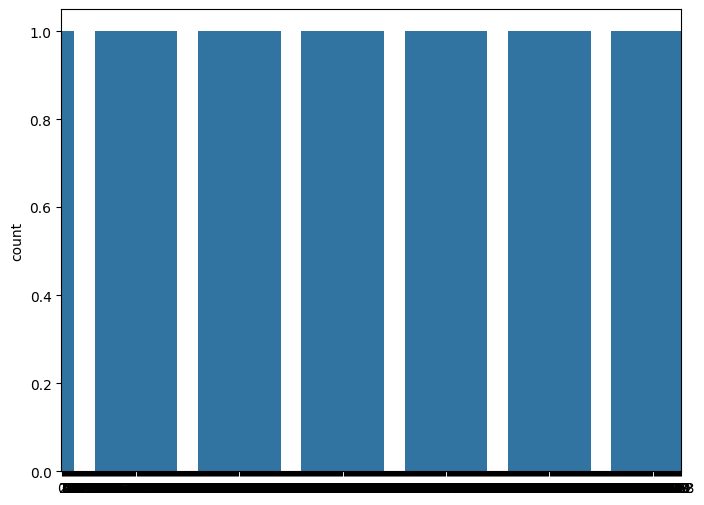

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print('yes',yes)
print('no',no)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


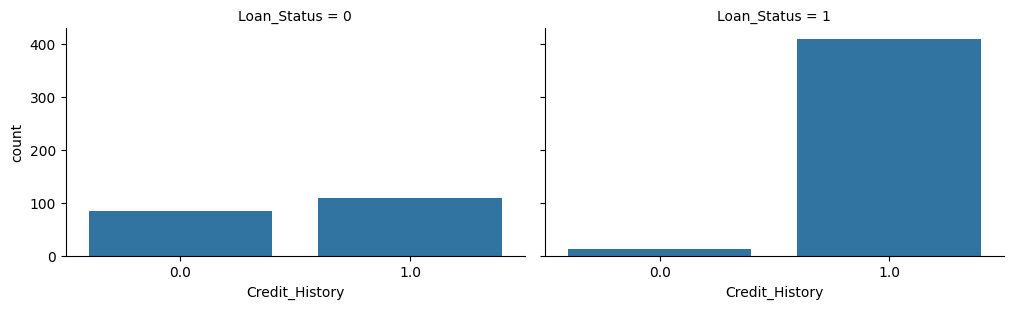

In [ ]:
grid=sns.FacetGrid(X,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


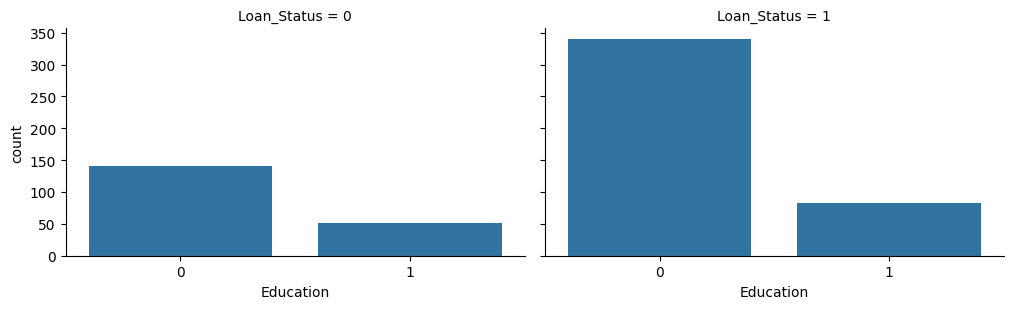

In [ ]:
grid=sns.FacetGrid(X,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot, 'Education')


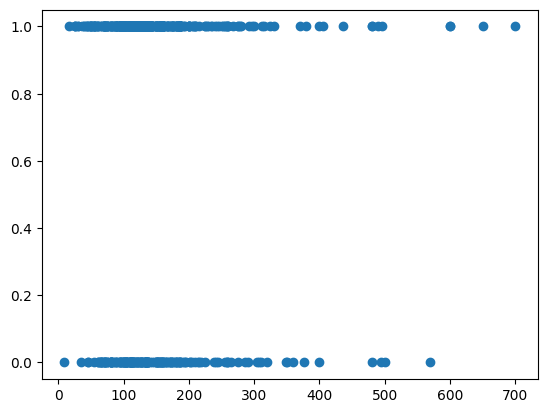

In [ ]:
plt.scatter(X['LoanAmount'],X['Loan_Status'])

In [ ]:
sss= StratifiedShuffleSplit (n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,Y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  Y_train,Y_test=Y.iloc[train],Y.iloc[test]

print('X_train taille :',X_train.shape)
print('X_test taille :',X_test.shape)
print('Y_train taille :',Y_train.shape)
print('Y_test taille :',Y_test.shape)


X_train taille : (491, 12)
X_test taille : (123, 12)
Y_train taille : (491,)
Y_test taille : (123,)


In [ ]:
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [ ]:
def accu(Y_true,Y_pred,retu=False):
  acc=accuracy_score(Y_true,Y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modele est :{acc}')


In [ ]:
def train_test_eval(models,X_train,X_test,Y_train,Y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,Y_train)
    accu(Y_test,model.predict(X_test))
    print('-'*30)

In [ ]:
train_test_eval(models,X_train,X_test,Y_train,Y_test)

LogisticRegression :
la precision du modele est :1.0
------------------------------
KNeighborsClassifier :
la precision du modele est :0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modele est :1.0
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Classifier=LogisticRegression()
Classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pickle.dump(Classifier,open('model.pkl','wb'))